In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Load input image and predicted mask
# PATH = r"D:\Uni\SS23\Praktikum\Hair_Segmentation_Recoloring\saveimage"
idx = "//5"
# mask_PATH = PATH + "//pred_mask" + idx + ".png"
input_PATH = PATH + "//ori_image" + idx + ".png"
mask_PATH = "D:\Uni\SS23\Praktikum\Hair_Segmentation_Recoloring\saveimage\pred_mask\5.png"
# input_PATH = "D:\Uni\SS23\Praktikum\Hair_Segmentation_Recoloring\saveimage\ori_image\5.png"

In [32]:
mask = cv2.imread(mask_PATH)
H, W, _ = mask.shape
input_img = cv2.imread(input_PATH)
input_img = cv2.resize(input_img, (H,W))
img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

In [33]:
print(img.shape)

(512, 512, 3)


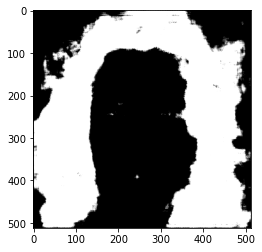

In [19]:
plt.imshow(mask[:,:,0], cmap="gray")

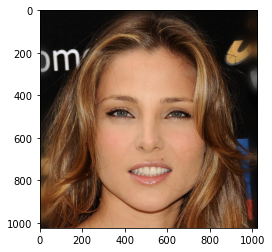

In [29]:
plt.imshow(img)

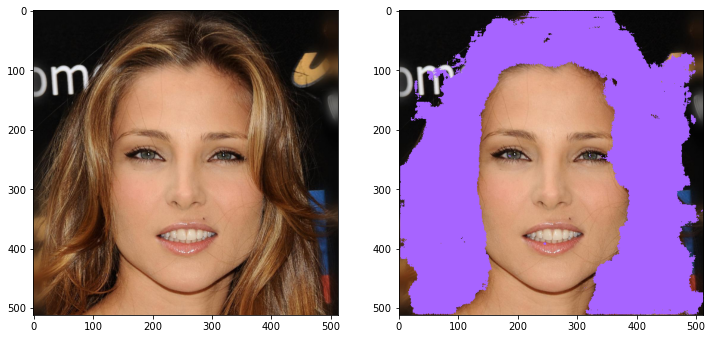

In [53]:
color = [255,100,167] # set the color you want
_, mask = cv2.threshold(mask, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
# copy where we'll assign the new values
green_hair = np.copy(input_img)
# boolean indexing and assignment based on mask
green_hair[(mask==255).all(-1)] = color

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(green_hair, cv2.COLOR_BGR2RGB))

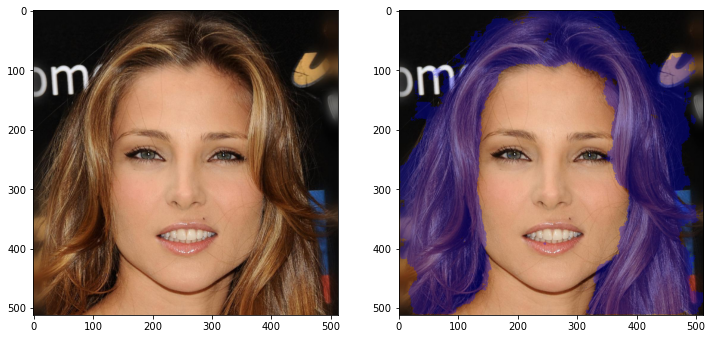

In [51]:
alpha = 0.7
green_hair_w = cv2.addWeighted(green_hair, 1-alpha, input_img, alpha, 0, green_hair)

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(green_hair_w, cv2.COLOR_BGR2RGB))

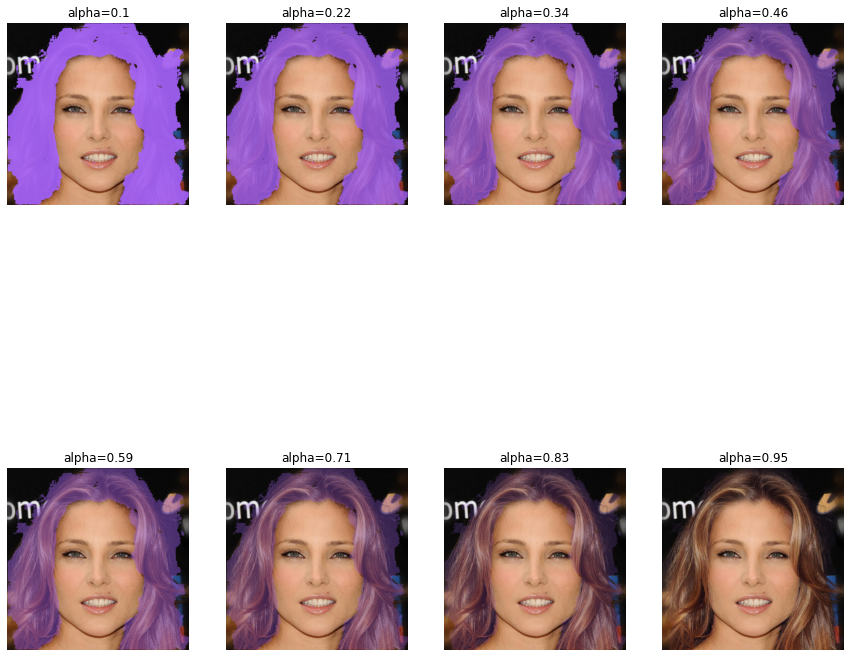

In [54]:
green_hair = np.copy(input_img)
# boolean indexing and assignment based on mask
green_hair[(mask==255).all(-1)] = color
fig, axes = plt.subplots(2,4,figsize=(15,15))
for ax, alpha in zip(axes.flatten(), np.linspace(.1, .95, 8)):
    green_hair_w = cv2.addWeighted(green_hair, 1-alpha, input_img, alpha, 0, green_hair_w)
    ax.imshow(cv2.cvtColor(green_hair_w, cv2.COLOR_BGR2RGB))
    ax.set_title(f'alpha={round(alpha,2)}')    
    ax.axis('off')


### Another approach

In [37]:
a = np.where(mask[:,:,0]/255 > 0)
ones = np.ones_like(input_img)
ones[a] = [0.5,1,1]
r = input_img*ones

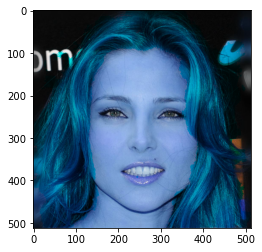

In [38]:
plt.imshow(r)